In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['train_data'] = 1
test['train_data'] = 0
data = pd.concat([train, test])

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_data
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_data   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_data   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_data
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [7]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_data'],
      dtype='object')

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_data'],
      dtype='object')

In [9]:
num = data[['Age','SibSp','Parch','Fare']].columns
cat = data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']].columns

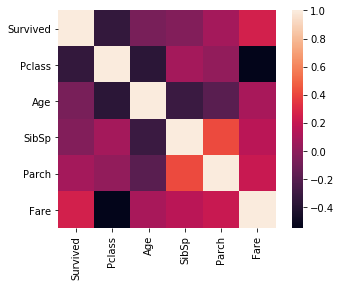

In [10]:
sns.heatmap(train.drop(['PassengerId', 'train_data'], axis=1).corr(), square=True)

In [11]:
train['train_data']

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: train_data, Length: 891, dtype: int64

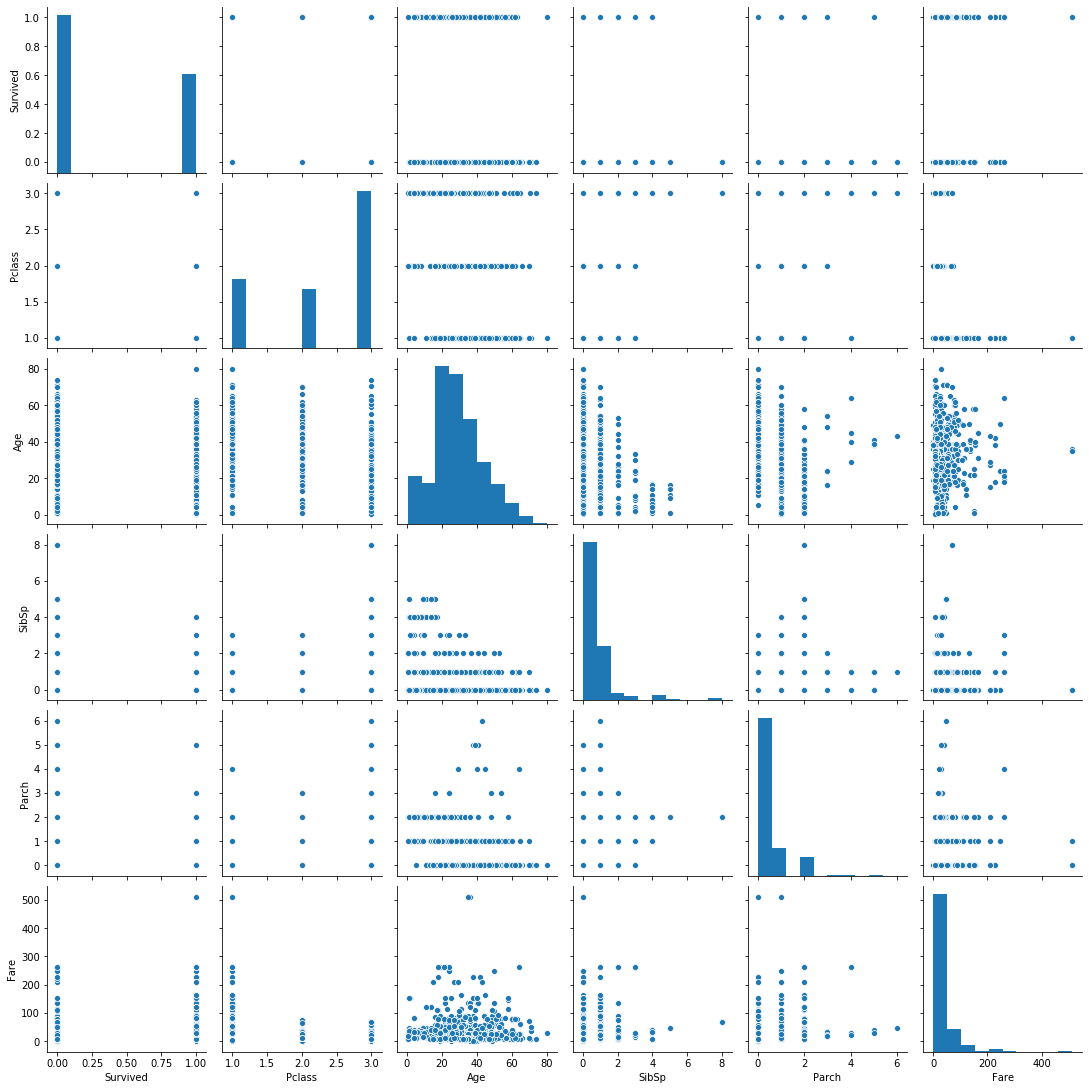

In [12]:
sns.pairplot(train.drop(['PassengerId', 'train_data'], axis=1))

In [13]:
pd.pivot_table(train, index = 'Survived', values = num)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [14]:
for i in ['Sex', 'Pclass', 'Embarked']:
    print(pd.pivot_table(train, index = 'Survived', columns = i, values = 'PassengerId', aggfunc = 'count'),"\n")

Sex       female  male
Survived              
0             81   468
1            233   109 

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217 



In [15]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [16]:
data.Age = data.Age.fillna(train.Age.median)
data.dropna(subset=['Embarked'],inplace = True)
data.dropna(subset=['Fare'], inplace=True)
data['Fare'] = np.log(data.Fare+1)
data = data.drop('Name',axis=1)
data = data.drop('Ticket',axis=1)
data = data.drop('Cabin',axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1306 non-null   int64  
 3   Sex          1306 non-null   object 
 4   Age          1306 non-null   object 
 5   SibSp        1306 non-null   int64  
 6   Parch        1306 non-null   int64  
 7   Fare         1306 non-null   float64
 8   Embarked     1306 non-null   object 
 9   train_data   1306 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 112.2+ KB


In [18]:
data[['Pclass', 'Sex', 'Embarked']] = data[['Pclass', 'Sex', 'Embarked']].astype(str)

In [19]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_data
0,1,0.0,3,male,22,1,0,2.110213,S,1
1,2,1.0,1,female,38,1,0,4.280593,C,1
2,3,1.0,3,female,26,0,0,2.188856,S,1
3,4,1.0,1,female,35,1,0,3.990834,S,1
4,5,0.0,3,male,35,0,0,2.202765,S,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,<bound method Series.median of 0 22.0\n1 ...,0,0,2.202765,S,0
414,1306,NaN,1,female,39,0,0,4.699571,C,0
415,1307,NaN,3,male,38.5,0,0,2.110213,S,0
416,1308,NaN,3,male,<bound method Series.median of 0 22.0\n1 ...,0,0,2.202765,S,0


In [21]:
numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),
        ('cat', categorical_transformer, ['Pclass', 'Sex', 'Embarked'])
    ]
)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

In [24]:
X_train = data[data.train_data==1].copy().drop(['PassengerId', 'Survived', 'train_data'], axis=1)
y_train = data[data.train_data==1].copy().Survived
X_test = data[data.train_data==0].copy().drop(['PassengerId', 'Survived','train_data'], axis=1)

In [25]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,2.110213,S
1,1,female,38,1,0,4.280593,C
2,3,female,26,0,0,2.188856,S
3,1,female,35,1,0,3.990834,S
4,3,male,35,0,0,2.202765,S
...,...,...,...,...,...,...,...
886,2,male,27,0,0,2.639057,S
887,1,female,19,0,0,3.433987,S
888,3,female,<bound method Series.median of 0 22.0\n1 ...,1,2,3.196630,S
889,1,male,26,0,0,3.433987,C


In [31]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)
                         ])

pipeline.fit(X_train, y_trai)

#scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring = 'accuracy')
#print(scores)


[nan nan nan nan nan]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: float() argument must be a string or a number, not 'method'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: float() argument must be a string or a number, not 'method'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: float() argument must be a string or a number, not 'method'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_valid